In [1]:
import pandas as pd
import numpy as np

In [2]:
esl = pd.read_csv('eslKillFeed.csv')
esl.head()
esl[esl['Weapon'] == 'Splode']

,Player,KilledBy,Weapon,Distance,Storm Phase,Timestamp,Match,Placed,Kills
21,Dmo,Tuckz,Splode,NaN,7.0,20:52,1,22,3
120,Motor,Tschinken,Splode,NaN,7.0,20:49,2,21,2
136,Poach,Razzzero0o,Splode,NaN,5.0,19:10,2,37,2
152,Mitr0,Lil Jay,Splode,NaN,4.0,17:05,2,53,1
340,Inclyde,Noward,Splode,NaN,5.0,18:40,4,41,1
366,Ryux,NaN,Splode,NaN,2.0,11:27,4,67,0
395,Lil Jay,NaN,Splode,NaN,1.0,2:26,4,96,0
445,Airwaks,Bizzle,Splode,70.0,5.0,18:52,5,46,0
602,Tschinken,Sinooh,Splode,NaN,9.0,22:48,7,3,2
603,Crippa,Sinooh,Splode,NaN,9.0,22:44,7,4,1


In [21]:
esl_placement_points = {1:65,2:58,3:56,4:54,5:52,6:50,7:48,8:46,9:44,10:42,11:40,12:39,13:38,14:37,15:36,16:35,17:34,18:33,19:32,20:31,21:30,22:29,23:28,24:27,25:26,26:25,27:24,28:23,29:22,30:21,31:20,32:19,33:18,34:17,35:16,36:15,37:14,38:13,39:12,40:11,41:10,42:9,43:8,44:7,45:6,46:5,47:4,48:3,49:2,50:1}

In [22]:
esl_p = pd.DataFrame(index = esl['Player'].unique(), columns=['Points', 'Victory Royales', 'Kill Points', 'Kills', 'Placement Points']).fillna(0)
for i, row in esl.iterrows():
    esl_p['Kills'][row['Player']] += row['Kills']
    esl_p['Points'][row['Player']] += row['Kills']*5
    esl_p['Kill Points'][row['Player']] += row['Kills']*5
    if (row['Placed'] < 51):
        esl_p['Points'][row['Player']] += esl_placement_points[row['Placed']]
        esl_p['Placement Points'][row['Player']] += esl_placement_points[row['Placed']]
    if (row['Placed']==1):
        esl_p['Victory Royales'][row['Player']] +=1
esl_p['Avg. Placement'] = esl.groupby('Player')['Placed'].mean()
esl_p = esl_p.sort_values(['Points','Victory Royales','Kills', 'Avg. Placement'], ascending=[False, False, False, True]).reset_index()
esl_p.index+=1
esl_p = esl_p.reset_index().rename(columns={'level_0':'Rank', 'index':'Player'})

In [163]:
esl_p[0:50]

,Rank,Player,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
0,1,Vinny1x,329,0,75,15,254,21.571429
1,2,Magin,316,0,85,17,231,25.714286
2,3,Kinstaar,269,1,50,10,219,23.000000
3,4,Bizzle,255,1,45,9,210,29.714286
4,5,Skite,248,0,55,11,193,24.714286
5,6,Animal,244,1,45,9,199,32.285714
6,7,Zayt,244,0,40,8,204,27.857143
7,8,Skram,237,1,45,9,192,25.714286
8,9,Ares,233,0,70,14,163,34.142857
9,10,TheVic,230,1,45,9,185,33.285714


In [159]:
esl_p.sort_values('Avg. Placement').tail(10)

,Rank,Player,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
88,89,Sak0ner,39,0,5,1,34,72.857143
93,94,Faah,15,0,15,3,0,73.285714
98,99,Rizart,2,0,0,0,2,74.000000
91,92,Myth,25,0,15,3,10,74.571429
96,97,Eryc,5,0,5,1,0,74.857143
94,95,Lolito,10,0,10,2,0,76.000000
68,69,Aspect,77,0,35,7,42,77.428571
90,91,Maxalibur,27,0,20,4,7,78.000000
97,98,Pow3r,5,0,5,1,0,80.285714
95,96,Mushway,10,0,10,2,0,85.428571


In [160]:
esl_p.sort_values('Kills', ascending=False).tail(20)

,Rank,Player,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
75,76,Sk1x,66,0,15,3,51,60.857143
64,65,Saf,85,0,15,3,70,52.285714
63,64,Nero,88,0,15,3,73,51.714286
58,59,Airwaks,99,0,10,2,89,46.857143
82,83,Windwalker,52,0,10,2,42,56.857143
83,84,Lil Jay,51,0,10,2,41,63.857143
71,72,Chap,74,0,10,2,64,49.857143
65,66,Crazy Llama,84,0,10,2,74,48.142857
87,88,Cloud,39,0,10,2,29,58.714286
95,96,Mushway,10,0,10,2,0,85.428571


In [48]:
ss = pd.read_csv('SecretSkirmishKillFeed.csv')
ss.dtypes

Player          object
KilledBy        object
Weapon          object
Distance       float64
Storm Phase      int64
Timestamp       object
Match          float64
Placed           int64
Kills            int64
dtype: object

In [49]:
ss_placement_points = {1:3,2:2,3:2,4:1,5:1,6:1,7:1,8:1,9:1,10:1}
ss_kill_points = {0:0, 1:0, 2:0, 3:1, 4:1, 5:2, 6:2, 7:3, 8:4, 9:5, 10:6, 11:7, 12:8, 13:9, 14:10, 15:11, 16:12, 17:13, 18:14, 19:15, 20:16, 21:17}

In [50]:
ss_p = pd.DataFrame(index = ss['Player'].unique(), columns=['Points', 'Victory Royales', 'Kill Points', 'Kills', 'Placement Points']).fillna(0)
for i, row in ss.iterrows():
    ss_p['Kills'][row['Player']] += row['Kills']
    ss_p['Points'][row['Player']] += ss_kill_points[row['Kills']]
    ss_p['Kill Points'][row['Player']] += ss_kill_points[row['Kills']]
    if (row['Placed'] < 11):
        ss_p['Points'][row['Player']] += ss_placement_points[row['Placed']]
        ss_p['Placement Points'][row['Player']] += ss_placement_points[row['Placed']]
    if (row['Placed']==1):
        ss_p['Victory Royales'][row['Player']] +=1
ss_p['Avg. Placement'] = ss.groupby('Player')['Placed'].mean()
ss_p = ss_p.sort_values(['Points','Victory Royales','Kills','Avg. Placement'], ascending=[False, False, False, True]).reset_index()
ss_p.index+=1
ss_p = ss_p.reset_index().rename(columns={'level_0':'Rank', 'index':'Player'})

In [51]:
ss_p.head()

,Rank,Player,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
0,1,Bizzle,12,2,4,17,8,15.833333
1,2,Saf,11,1,6,20,5,13.833333
2,3,Vivid,9,1,5,17,4,34.000000
3,4,Kyzui,8,0,4,12,4,30.000000
4,5,Pearl,7,1,4,14,3,33.166667


In [52]:
import matplotlib.pyplot as plt
from matplotlib import cm
import datetime as dt
%matplotlib inline

C:\Users\eduar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


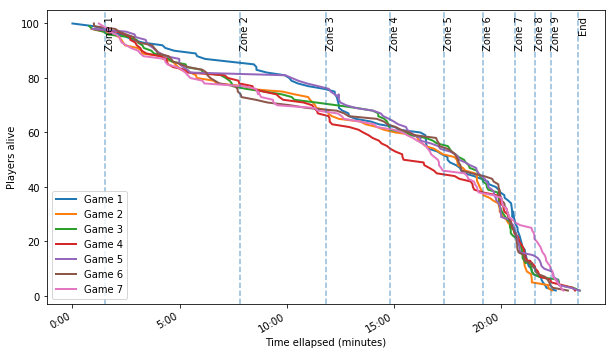

In [119]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(1,8):
    tmp = esl[(esl['Match']==i) & (esl['Timestamp'] != np.NaN)]
    tmp['Timestamp'] = pd.to_datetime(tmp['Timestamp'], format='%M:%S')
    tmp.plot('Timestamp', 'Placed',ax=ax, label='Game {}'.format(i), linewidth=2)
timestamps = ['1:30', '7:50', '11:50', '14:50', '17:20', '19:10', '20:40', '21:35', '22:20','23:35']
for i, time in enumerate(timestamps):
    ax.axvline(pd.to_datetime(time, format='%M:%S'), linestyle='--', alpha=0.5)
    ax.text(pd.to_datetime(time, format='%M:%S'),100, 'Zone %d' % (i+1) if i < 9 else 'End', rotation=90)
ax.set_xlabel('Time ellapsed (minutes)')
ax.set_ylabel('Players alive')
ax.set_xticklabels(['0:00', '5:00', '10:00', '15:00', '20:00'])
plt.savefig('media/graph3.png', transparent=False)

C:\Users\eduar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\eduar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


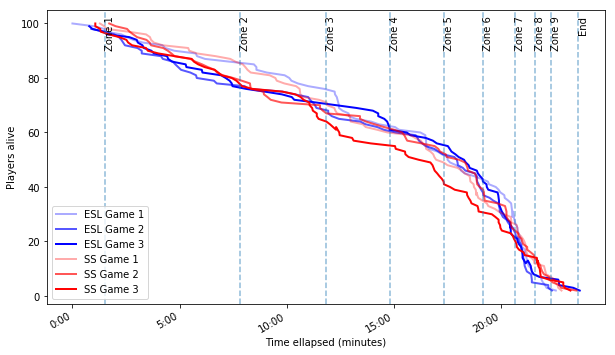

In [118]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(1,4):
    tmp = esl[(esl['Match']==i) & (esl['Timestamp'] != np.NaN)]
    tmp['Timestamp'] = pd.to_datetime(tmp['Timestamp'], format='%M:%S')
    tmp.plot('Timestamp', 'Placed',ax=ax, label='ESL Game {}'.format(i), linewidth=2, color='blue', alpha=0.33*i)
for i in range(1,4):
    tmp = ss[(ss['Match']==i) & (ss['Timestamp'] != np.NaN)]
    tmp['Timestamp'] = pd.to_datetime(tmp['Timestamp'], format='%M:%S')
    tmp.plot('Timestamp', 'Placed',ax=ax, label='SS Game {}'.format(i), linewidth=2, color='red', alpha=0.33*i)
timestamps = ['1:30', '7:50', '11:50', '14:50', '17:20', '19:10', '20:40', '21:35', '22:20','23:35']
for i, time in enumerate(timestamps):
    ax.axvline(pd.to_datetime(time, format='%M:%S'), linestyle='--', alpha=0.5)
    ax.text(pd.to_datetime(time, format='%M:%S'),100, 'Zone %d' % (i+1) if i < 9 else 'End', rotation=90)
ax.set_xlabel('Time ellapsed (minutes)')
ax.set_ylabel('Players alive')
ax.set_xticklabels(['0:00', '5:00', '10:00', '15:00', '20:00'])
plt.savefig('media/graph4.png', transparent=False)

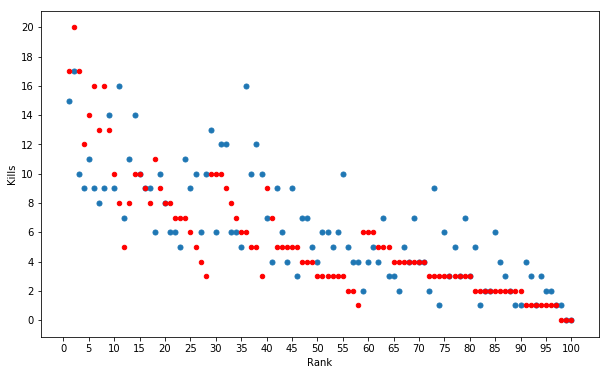

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
esl_p.plot.scatter(x='Rank', y='Kills', ax=ax, s=25)
ss_p.plot.scatter(x='Rank', y='Kills', ax=ax,color='r')
ax.set_yticks(np.arange(0,22,2))
ax.set_xticks(np.arange(0,101,5))

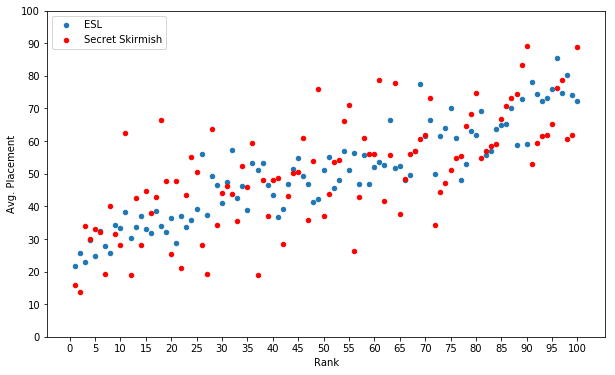

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
esl_p.plot.scatter(x='Rank', y='Avg. Placement', ax=ax, label='ESL')
ss_p.plot.scatter(x='Rank', y='Avg. Placement', ax=ax, color='r', label='Secret Skirmish')
ax.set_xticks(np.arange(0,101,5))
ax.set_yticks(np.arange(0,101,10))
plt.savefig('media/graph1.png', transparent=False)

In [58]:
from scipy import stats

In [59]:
stats.pearsonr(ss_p['level_0'], ss_p['Avg. Placement'])

KeyError: 'level_0'

In [61]:
top20 = esl_p['Player'].head(20).tolist()
esl_20 = esl[esl['KilledBy'].isin(top20)]
esl_20['Timestamp'] = pd.to_datetime(esl_20['Timestamp'], format='%M:%S')
esl_20['Timestamp'] = (esl_20['Timestamp'].dt.minute * 60) + esl_20['Timestamp'].dt.second
order = dict(zip(top20, range(len(top20))))
esl_20['order'] = esl_20['KilledBy'].map(order)
esl_20 = esl_20.sort_values('order')
esl_20_d = esl[esl['Player'].isin(top20)]
esl_20_d['Timestamp'] = pd.to_datetime(esl_20_d['Timestamp'], format='%M:%S')
esl_20_d['Timestamp'] = (esl_20_d['Timestamp'].dt.minute * 60) + esl_20_d['Timestamp'].dt.second
esl_20_d['order'] = esl_20_d['Player'].map(order)
esl_20_d = esl_20_d.sort_values('order')

C:\Users\eduar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\eduar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\eduar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

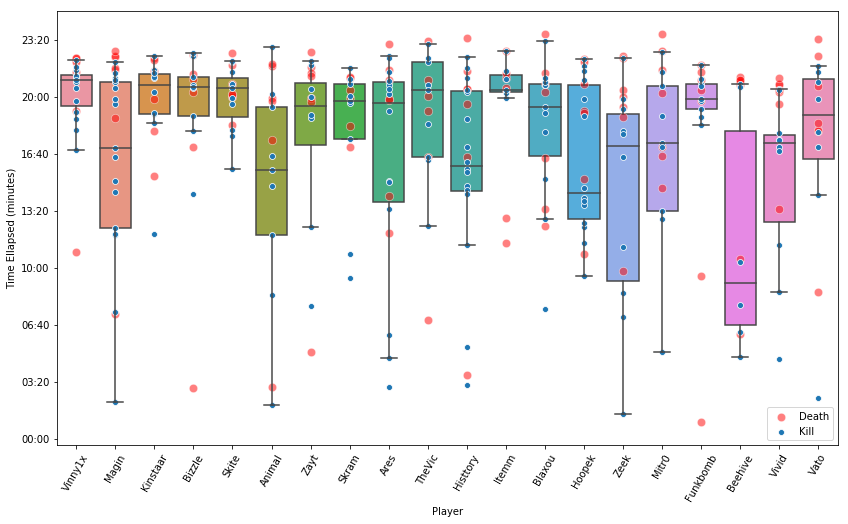

In [71]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x='KilledBy', y='Timestamp', ax=ax, data=esl_20, showfliers=False)
sns.scatterplot(x='Player', y='Timestamp', ax=ax, data=esl_20_d, color='r', s=70, alpha=0.5,label='Death')
sns.scatterplot(x='KilledBy', y='Timestamp', ax=ax, data=esl_20, label='Kill')

ax.tick_params('x', rotation=60)
ax.set_yticklabels([pd.to_datetime(tm, unit='s').strftime('%M:%S') for tm in ax.get_yticks()])
ax.set_xlabel('Player')
ax.set_ylabel('Time Ellapsed (minutes)')
ax.legend(loc='lower right')
plt.savefig('media/graph2.png', transparent=False)

In [12]:
ss_p = pd.DataFrame(index = esl['Player'].unique(), columns=['Points', 'Victory Royales', 'Kill Points', 'Kills', 'Placement Points']).fillna(0)
for i, row in esl.iterrows():
    ss_p['Kills'][row['Player']] += row['Kills']
    ss_p['Points'][row['Player']] += ss_kill_points[row['Kills']]
    ss_p['Kill Points'][row['Player']] += ss_kill_points[row['Kills']]
    if (row['Placed'] < 11):
        ss_p['Points'][row['Player']] += ss_placement_points[row['Placed']]
        ss_p['Placement Points'][row['Player']] += ss_placement_points[row['Placed']]
    if (row['Placed']==1):
        ss_p['Victory Royales'][row['Player']] +=1
ss_p['Avg. Placement'] = esl.groupby('Player')['Placed'].mean()
ss_p = ss_p.sort_values(['Points','Victory Royales','Kills','Avg. Placement'], ascending=[False, False, False, True]).reset_index()
ss_p.index+=1
ss_p = ss_p.reset_index().rename(columns={'level_0':'Rank', 'index':'Player'})

In [16]:
ss_p[0:25]

,Rank,Player,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
0,1,Magin,9,0,5,17,4,25.714286
1,2,Vinny1x,8,0,4,15,4,21.571429
2,3,Kinstaar,7,1,2,10,5,23.000000
3,4,Julez,6,1,2,10,4,56.142857
4,5,Bizzle,6,1,2,9,4,29.714286
5,6,TheVic,6,1,1,9,5,33.285714
6,7,Histtory,6,0,4,16,2,38.142857
7,8,Aydan,6,0,5,16,1,53.428571
8,9,Ares,6,0,3,14,3,34.142857
9,10,Jarkos,6,0,3,10,3,49.285714


In [17]:
ss_p.sort_values('Kills', ascending=False)

,Rank,Player,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
0,1,Magin,9,0,5,17,4,25.714286
6,7,Histtory,6,0,4,16,2,38.142857
7,8,Aydan,6,0,5,16,1,53.428571
1,2,Vinny1x,8,0,4,15,4,21.571429
12,13,Hoopek,5,0,3,14,2,37.000000
8,9,Ares,6,0,3,14,3,34.142857
13,14,Madzen,5,0,4,13,1,46.571429
27,28,Issa,3,0,2,12,1,53.285714
26,27,Villex,3,0,2,12,1,47.428571
19,20,Tommo,4,0,3,12,1,57.142857


In [161]:
players = pd.read_csv('players.csv')
players = players.merge(esl_p, how='left', left_on='Player', right_on='Player')[['Player', 'Team', 'Country', 'Rank']].sort_values('Rank')
players.groupby('Team').filter(lambda x: len(x) > 1).groupby('Team')['Rank'].mean().sort_values()


Team
LeStream           12.000000
NRG                23.500000
LDLC               26.500000
AGO                31.500000
Forward            32.500000
Faze               34.500000
Ghost              35.333333
Sentinels          37.500000
Secret             42.500000
G2                 43.500000
GamersOrigin       43.500000
Solary             45.000000
Atlantis           46.833333
Renegades          47.500000
Meta               49.000000
Liquid             50.250000
TSM                50.750000
INTZ               52.500000
OP                 52.500000
E11                56.600000
Virtus Pro         57.000000
World Elite        59.500000
Natus Vincere      60.000000
Devils.one         61.000000
Unique             72.500000
Fnatic             74.250000
Heretics           80.000000
Vodafone Giants    81.500000
Crazy Racoon       82.500000
Prism Gang         83.000000
Vitality           85.000000
Name: Rank, dtype: float64

In [92]:
w = esl[esl['Weapon']!='DQ']['Weapon'].value_counts().to_frame().reset_index()
w.columns=['Weapon', 'Count']
total = np.sum(w.loc[:,'Count':].values)
w['percent'] = w.loc[:,'Count':].sum(axis=1)/total * 100

w

,Weapon,Count,percent
0,Shotgun,277,42.681048
1,Rifle,131,20.184900
2,Smg,108,16.640986
3,Storm,35,5.392912
4,Sniper,28,4.314330
5,FallDamage,18,2.773498
6,Splode,15,2.311248
7,StinkGrenade,11,1.694915
8,Pistol,9,1.386749
9,Trap,9,1.386749


In [3]:
g_placement_points = {1:10,2:7,3:7,4:7,5:7,6:5,7:5,8:5,9:5,10:5,11:3,12:3,13:3,14:3,15:3,16:3,17:3,18:3,19:3,20:3,21:3,22:3,23:3,24:3,25:3}

In [4]:
g_p = pd.DataFrame(index = esl['Player'].unique(), columns=['Points', 'Victory Royales', 'Kill Points', 'Kills', 'Placement Points']).fillna(0)
for i, row in esl.iterrows():
    g_p['Kills'][row['Player']] += row['Kills']
    g_p['Points'][row['Player']] += row['Kills']
    g_p['Kill Points'][row['Player']] += row['Kills']
    if (row['Placed'] < 26):
        g_p['Points'][row['Player']] += g_placement_points[row['Placed']]
        g_p['Placement Points'][row['Player']] += g_placement_points[row['Placed']]
    if (row['Placed']==1):
        g_p['Victory Royales'][row['Player']] +=1
g_p['Avg. Placement'] = esl.groupby('Player')['Placed'].mean()
g_p = g_p.sort_values(['Points','Victory Royales','Kills', 'Avg. Placement'], ascending=[False, False, False, True]).reset_index()
g_p.index+=1
g_p = g_p.reset_index().rename(columns={'level_0':'Rank', 'index':'Player'})

In [5]:
g_p

,Rank,Player,Points,Victory Royales,Kill Points,Kills,Placement Points,Avg. Placement
0,1,Magin,42,0,17,17,25,25.714286
1,2,Vinny1x,42,0,15,15,27,21.571429
2,3,Kinstaar,33,1,10,10,23,23.000000
3,4,Animal,31,1,9,9,22,32.285714
4,5,Bizzle,30,1,9,9,21,29.714286
5,6,TheVic,29,1,9,9,20,33.285714
6,7,Histtory,29,0,16,16,13,38.142857
7,8,Ares,29,0,14,14,15,34.142857
8,9,Zayt,28,0,8,8,20,27.857143
9,10,Julez,27,1,10,10,17,56.142857
